## Loading K3 multi-frame EELS data

After collecting K4 in-situ multi-frame data you will have to conver the data into DM5 file format. This is an HDF5 type file with added attributes regarding the data structure to then be able to read the corresponding RAW files correctly.

Conersion to DM5 file format is sometime prone to errors - e.g. not being able to locate the RAW files. It is recommended to do this conversion on the E01 Gatan PC right after data collection.

Here we look at example spectrum image data.

In [13]:
import sys
sys.path.append('/dls_sw/e02/software/epsic_tools')
import epsic_tools.api as ep
import exspy
import hyperspy.api as hs
import h5py

In [14]:
# These two paths are the converted DM5 file format
file_path = '/dls/science/groups/e01/example_K3_EELS_data/InSitu (1)/STEM SI_EELS HL SI.dm5'
file_path_LL = '/dls/science/groups/e01/example_K3_EELS_data/InSitu (1)/STEM SI_EELS LL SI.dm5'

# We can use the dm4 files in the same daaset to get the metadata info
d_cal_hl = hs.load(r'/dls/science/groups/e01/example_K3_EELS_data/InSitu (1)/STEM SI_EELS HL SI.dm4')
d_cal_ll = hs.load(r'/dls/science/groups/e01/example_K3_EELS_data/InSitu (1)//STEM SI_EELS LL SI.dm4')

### You can read the attributes just like a normal HDF file:

In [16]:
f = h5py.File(file_path, "r")
def print_attrs(name, obj):
    print(f"Name: {name}")
    for key, value in obj.attrs.items():
        print(f"   Attributes: {key} => {value}")
f.visititems(print_attrs)

Name: DocumentObjectList
Name: DocumentObjectList/[0]
   Attributes: AnnotationType => 20
   Attributes: BackgroundColor => (65535, 65535, 65535)
   Attributes: BackgroundMode => 2
   Attributes: FillMode => 1
   Attributes: ForegroundColor => (65535, 5140, 6168)
   Attributes: HasBackground => 0
   Attributes: ImageDisplayType => 1
   Attributes: ImageSource => 0
   Attributes: IsMoveable => 1
   Attributes: IsResizable => 1
   Attributes: IsSelectable => 1
   Attributes: IsTransferrable => 1
   Attributes: IsTranslatable => 1
   Attributes: IsVisible => 1
   Attributes: Rectangle => (0., 0., 561., 715.4783)
   Attributes: RestrictionStyle => 0
   Attributes: Transparency => 0.0
   Attributes: UniqueID => 8
Name: DocumentObjectList/[0]/ImageDisplayInfo
   Attributes: BrightColor => (65535, 65535, 65535)
   Attributes: Brightness => 0.5
   Attributes: CLUTName => b'Greyscale'
   Attributes: CaptionOn => 0
   Attributes: CaptionSize => 14
   Attributes: ComplexMode => 4
   Attributes: C

### Here we can load the data: 

In [17]:
MyInSituData = ep.load_k3_data.InSitu_K3_Reader(file_path) 
MyInSituData_LL = ep.load_k3_data.InSitu_K3_Reader(file_path_LL) 

Simple DM5 reader for InSitu K3 datasets:

Opening: /dls/science/groups/e01/example_K3_EELS_data/InSitu (1)/STEM SI_EELS HL SI.dm5
The number of frames in the RAW files matches to the stated Recorded number in DM5 file.
Total number of frames acquired: 15
Simple DM5 reader for InSitu K3 datasets:

Opening: /dls/science/groups/e01/example_K3_EELS_data/InSitu (1)/STEM SI_EELS LL SI.dm5
The number of frames in the RAW files matches to the stated Recorded number in DM5 file.
Total number of frames acquired: 15


Number of frames can be returned as a variable:

In [18]:
frames_num = MyInSituData.GetTotalFrameNum()

The number of frames in the RAW files matches to the stated Recorded number in DM5 file.
Total number of frames acquired: 15


### Getting an indivisual frame:

In [19]:
_d_ll = MyInSituData_LL.GetNthFrame_lazy(0)
_d_ll = exspy.signals.LazyEELSSpectrum(_d_ll)
_d_ll = _d_ll.transpose(signal_axes=[1], navigation_axes=[2,0])

### We won't have any metadata now:

In [20]:
_d_ll.axes_manager

Navigation axis name,size,index,offset,scale,units
,88,0,0.0,1.0,
,69,0,0.0,1.0,
Signal axis name,size,,offset,scale,units
,3456,,0.0,1.0,


### This can be copied form the info from the DM4 file

In [21]:
_d_ll.axes_manager = d_cal_ll.axes_manager

In [22]:
_d_ll.axes_manager

Navigation axis name,size,index,offset,scale,units
x,88,0,-0.0,0.0015002555446699262,µm
y,69,0,-0.0,0.0015002555446699262,µm
Signal axis name,size,,offset,scale,units
Energy loss,3456,,-35.999998683929334,0.18000000715255737,eV


In [23]:
_d_ll.compute()

[########################################] | 100% Completed | 156.09 s


2025-04-02 16:02:54,980:/dls_sw/apps/python/miniforge/4.10.0-0/envs/epsic3.10/lib/python3.10/site-packages/numba/core/entrypoints.py:38:Loading extension: EntryPoint(name='init', value='sparse._numba_extension:_init_extension', group='numba_extensions')


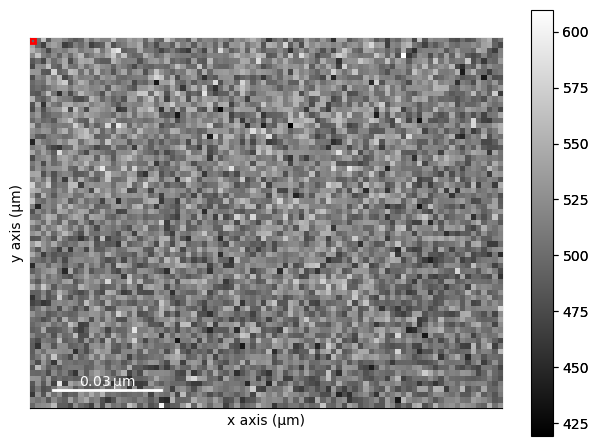

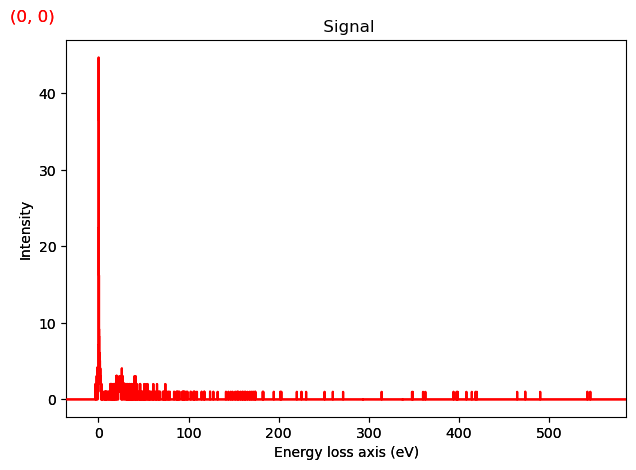

In [24]:
_d_ll.plot()